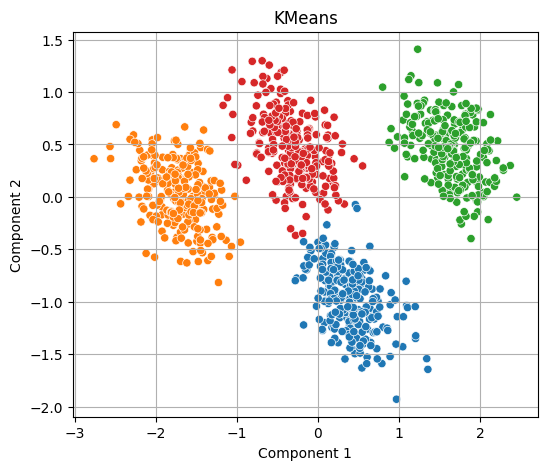

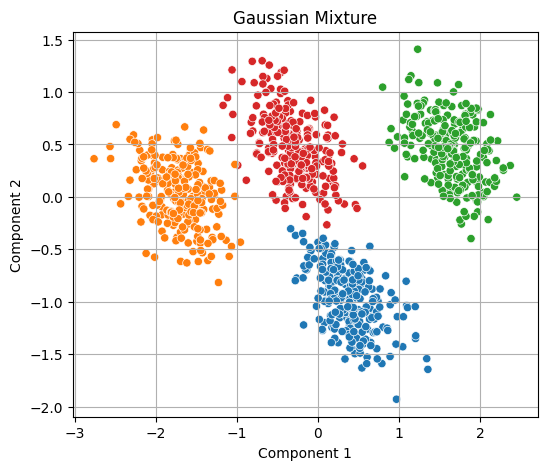

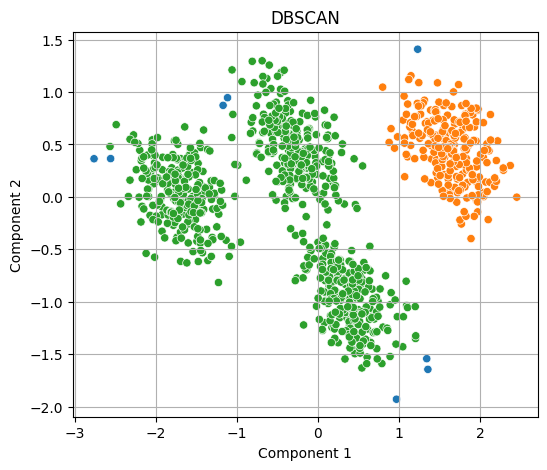

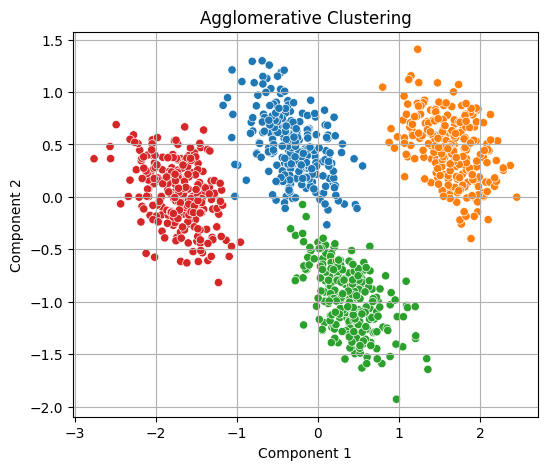

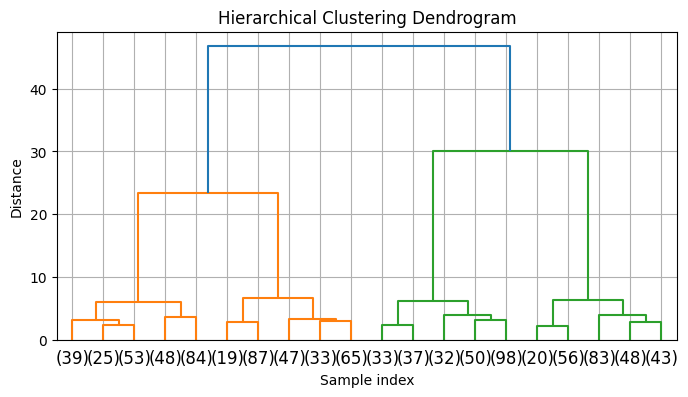

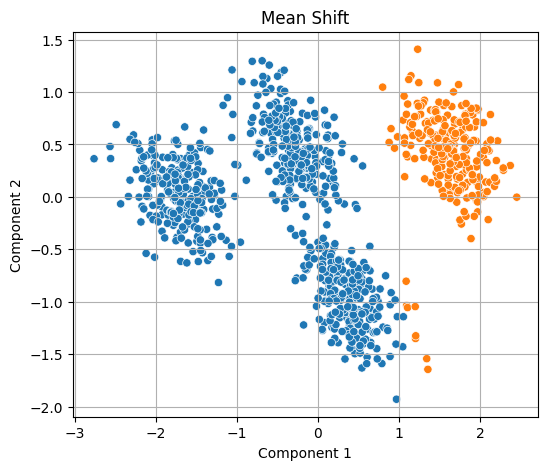

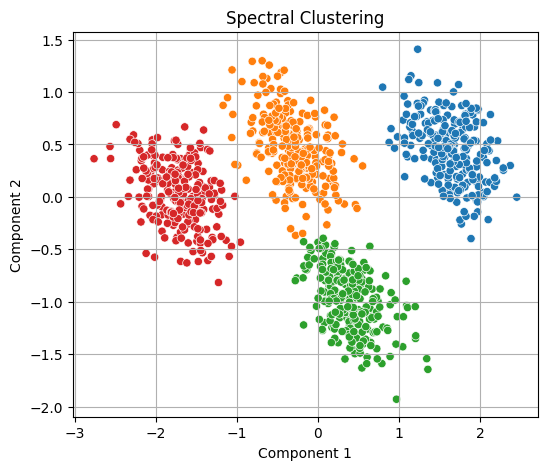

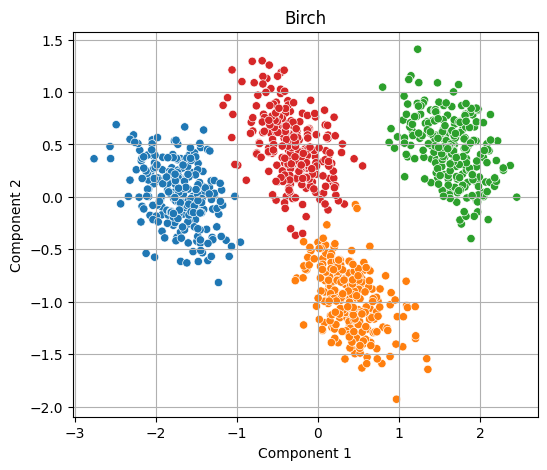

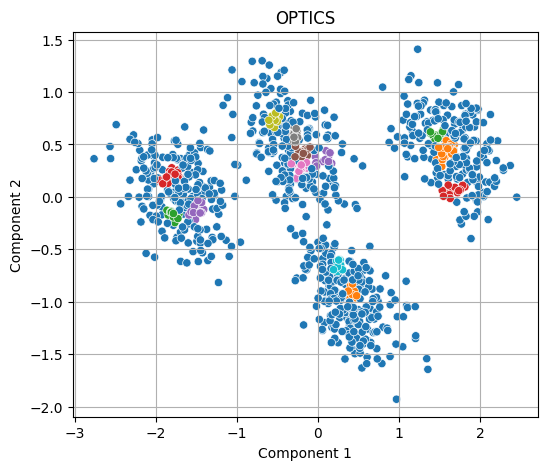

In [1]:
# Clustering: End-to-End Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering, Birch, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Data
df, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)
df = StandardScaler().fit_transform(df)

# Reduce to 2D
X_reduced = PCA(n_components=2).fit_transform(df)

# Plot helper
def plot_clusters(X, labels, title):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', legend=False)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans = kmeans.fit_predict(df)
plot_clusters(X_reduced, labels_kmeans, "KMeans")

# Gaussian Mixture
gmm = GaussianMixture(n_components=4, random_state=0)
labels_gmm = gmm.fit_predict(df)
plot_clusters(X_reduced, labels_gmm, "Gaussian Mixture")

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)
labels_dbscan = dbscan.fit_predict(df)
plot_clusters(X_reduced, labels_dbscan, "DBSCAN")

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=4)
labels_agg = agg.fit_predict(df)
plot_clusters(X_reduced, labels_agg, "Agglomerative Clustering")

# Dendrogram
plt.figure(figsize=(8, 4))
Z = linkage(df, 'ward')
dendrogram(Z, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Mean Shift
meanshift = MeanShift()
labels_meanshift = meanshift.fit_predict(df)
plot_clusters(X_reduced, labels_meanshift, "Mean Shift")

# Spectral Clustering
spectral = SpectralClustering(n_clusters=4, assign_labels='kmeans', random_state=0)
labels_spectral = spectral.fit_predict(df)
plot_clusters(X_reduced, labels_spectral, "Spectral Clustering")

# Birch
birch = Birch(n_clusters=4)
labels_birch = birch.fit_predict(df)
plot_clusters(X_reduced, labels_birch, "Birch")

# OPTICS
optics = OPTICS(min_samples=10)
labels_optics = optics.fit_predict(df)
plot_clusters(X_reduced, labels_optics, "OPTICS")



---

## Foundational & Algorithm-Specific Papers

* **K-Means++ (Improved Initialization for K-Means)**
  Arthur, D., & Vassilvitskii, S. (2007). *K-means++: The advantages of careful seeding.*
  Introduced a probabilistic method to initialize K-Means centroids that significantly improves convergence and cluster quality by optimizing the initial seed placement. [arXiv](https://arxiv.org/html/2401.07389v1?utm_source=chatgpt.com), [Wikipedia](https://en.wikipedia.org/wiki/K-means%2B%2B?utm_source=chatgpt.com)

* **DBSCAN (Density-Based Spatial Clustering)**
  Ester, M., Kriegel, H.-P., Sander, J., & Xu, X. (1996). *A density-based algorithm for discovering clusters in large spatial databases with noise.*
  A foundational clustering method capable of identifying arbitrarily shaped clusters and filtering noise without needing to predefine the number of clusters. [Wikipedia](https://en.wikipedia.org/wiki/DBSCAN?utm_source=chatgpt.com)

* **OPTICS (Ordering Points To Identify the Clustering Structure)**
  Ankerst, M., Breunig, M., Kriegel, H.-P., & Sander, J. (1999). *OPTICS: Ordering Points To Identify the Clustering Structure.*
  An extension of DBSCAN that handles variable-density clusters and produces reachability plots to analyze the clustering structure. [Wikipedia](https://en.wikipedia.org/wiki/OPTICS_algorithm?utm_source=chatgpt.com)

* **Mean Shift Clustering**
  Cheng, Y. (1995). *Mean Shift, Mode Seeking, and Clustering.*
  A kernel-based, non-parametric method for locating high-density regions in feature space. Later enhanced by Comaniciu & Meer (2002) for image segmentation and object tracking. [Advancing Analytics](https://www.advancinganalytics.co.uk/blog/2022/6/13/10-incredibly-useful-clustering-algorithms-you-need-to-know?utm_source=chatgpt.com), [Wikipedia](https://en.wikipedia.org/wiki/Mean_shift?utm_source=chatgpt.com)

* **Spectral Clustering**
  von Luxburg, U. (2007). *A Tutorial on Spectral Clustering.*
  A comprehensive guide to spectral clustering based on graph Laplacians, eigenvalues, and connectivity. This method is well-suited for non-convex clusters. [arXiv](https://arxiv.org/abs/0711.0189?utm_source=chatgpt.com)

---

## Comparative & Survey Papers

* **Comprehensive Survey of Clustering Algorithms**
  Xu, D., & Tian, Y. (2015). *A Comprehensive Survey of Clustering Algorithms.*
  An extensive review covering traditional (e.g., K-Means, hierarchical) and modern clustering algorithms with an analysis of similarity metrics, scalability, and performance. [Springer Link](https://link.springer.com/article/10.1007/s40745-015-0040-1?utm_source=chatgpt.com)

* **A Rapid Review of Clustering Algorithms (2024)**
  (2024). *A Rapid Review of Clustering Algorithms.*
  Categorizes and analyzes a wide range of clustering algorithms across five algorithmic dimensions. [arXiv](https://arxiv.org/html/2401.07389v1?utm_source=chatgpt.com)

* **Comparative Analysis on High-Dimensional Data (2025)**
  Baligodugula, V.V., & Amsaad, F. (2025). *Comparative Analysis of Clustering Techniques on High-Dimensional Data.*
  Compares K-Means, DBSCAN, and Spectral Clustering on datasets such as MNIST and UCI HAR, using PCA, t-SNE, and UMAP for dimensionality reduction. [arXiv](https://arxiv.org/abs/2503.23215?utm_source=chatgpt.com)

* **Overview of Clustering Techniques (2024)**
  (2024). *Overview of Clustering Techniques: From K-Means to Spectral Methods.*
  Provides performance comparisons of several clustering methods applied to high-dimensional datasets, leveraging dimensionality reduction for visualization. [ResearchGate](https://www.researchgate.net/publication/384971746_Overview_of_Clustering_Techniques_From_k-Means_to_Spectral_Methods?utm_source=chatgpt.com)

---

## Additional Noteworthy References

* **Survey of K-Means Variants**
  Ahmed, M. (2020). *The K-Means Algorithm: A Comprehensive Survey and Future Research Directions.*
  Discusses variations and enhancements to the K-Means algorithm, including initialization, distance metrics, and handling different data types. [MDPI](https://www.mdpi.com/2079-9292/9/8/1295?utm_source=chatgpt.com)

* **Clustering Methods Comparative Study**
  Rodríguez, M.Z. et al. (2019). *Clustering Algorithms: A Comparative Approach.*
  An empirical study comparing the performance of nine clustering algorithms under various synthetic and real-world data scenarios. [PubMed Central](https://pmc.ncbi.nlm.nih.gov/articles/PMC6333366/?utm_source=chatgpt.com)

---

### Summary of Key References

| Algorithm / Topic   | Reference and Contribution                                          |
| ------------------- | ------------------------------------------------------------------- |
| K-Means++           | Arthur & Vassilvitskii (2007) — Improved initialization strategy    |
| DBSCAN              | Ester et al. (1996) — Density-based, noise-resilient clustering     |
| OPTICS              | Ankerst et al. (1999) — Clustering with variable densities          |
| Mean Shift          | Cheng (1995) — Kernel density-based clustering                      |
| Spectral Clustering | von Luxburg (2007) — Graph-based spectral method                    |
| Algorithm Surveys   | Xu & Tian (2015); Rapid Review (2024); Baligodugula & Amsaad (2025) |
| K-Means Variants    | Ahmed (2020) — Advanced variants and limitations                    |
| Method Comparison   | Rodríguez et al. (2019); Overview (2024)                            |

---